# Preprocessing and Data Exploration

In [1]:
# Aachen dataset


# Set root directory of the project as the current working directory
import os
import sys

module_path = os.path.abspath('..')
if module_path not in sys.path:
    %cd ..

# Import Config from config.defaults and preprocess_aachen_dataset from src.preprocessing
from config.defaults import Config
from src.preprocessing import preprocess_aachen_dataset

# Load the default configuration
config = Config()

# Preprocess the dataset for regression
config.classification = False
preprocess_aachen_dataset(config)

# Preprocess the dataset for classification
config.classification = True 
preprocess_aachen_dataset(config)

/Users/sigurdgjerdingen/Student/Master/Master_Herstad-Gjerdingen


/opt/miniconda3/envs/D2D_env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:


# Import Config and preprocessing functions
from config.defaults import Config
from src.preprocessing import preprocess_mit_stanford_dataset

# Load the default configuration
config = Config()

# Preprocess MIT-Stanford dataset for regression
config.classification = False  
preprocess_mit_stanford_dataset(config)

# Preprocess MIT-Stanford dataset for classification
config.classification = True
preprocess_mit_stanford_dataset(config)


/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:291: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seq = pd.Series(seq).interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill').values


Preprocessing complete! Data saved in data/MIT_Stanford/processed/


/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:291: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seq = pd.Series(seq).interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill').values
/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:420: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  y_train = to_categorical(cat_y_train.map(label_mapping).astype(int), num_classes=len(labels))
/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:421: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_

Preprocessing complete! Data saved in data/MIT_Stanford/processed/


## Data Exploration

In [2]:
from src.models import load_preprocessed_data

model_task = 'regression'
dataset = 'MIT_Stanford'


X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, dataset=dataset)

2025-04-03 09:12:22,585 - INFO - Loaded preprocessed data and metadata for regression with EOL 0.8


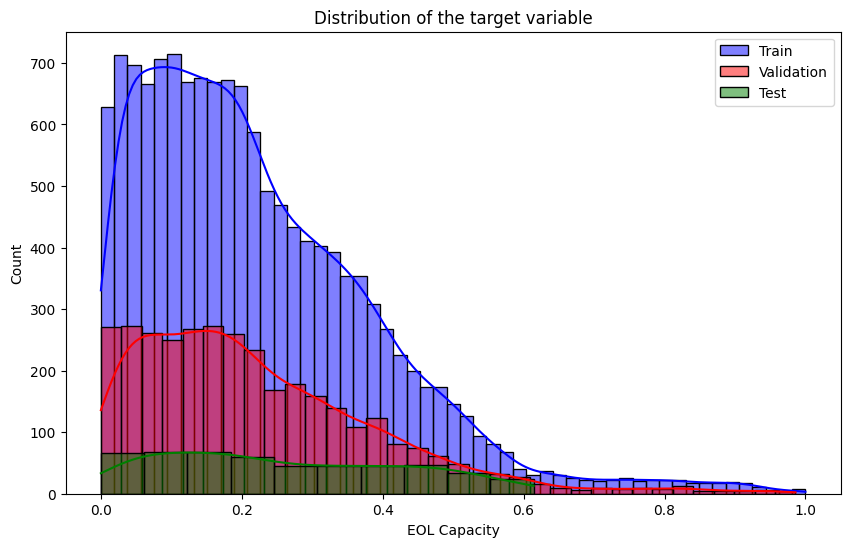

In [3]:
# Plot the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, color='blue', label='Train')

sns.histplot(y_val, kde=True, color='red', label='Validation')

sns.histplot(y_test, kde=True, color='green', label='Test')

plt.title('Distribution of the target variable')
plt.xlabel('EOL Capacity')
plt.legend()
plt.show()

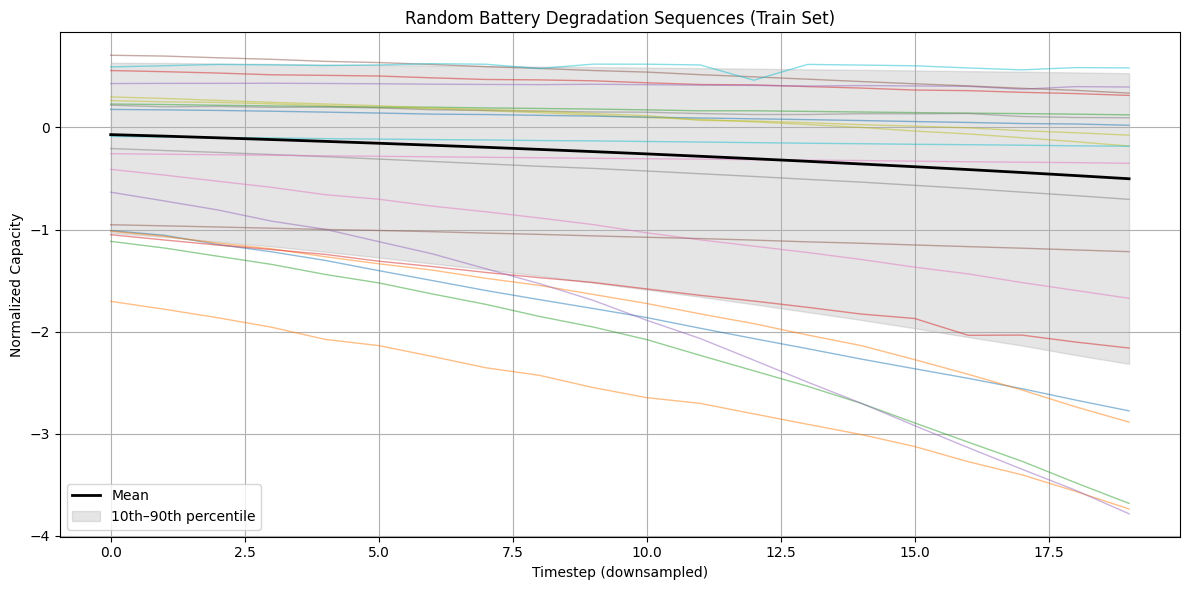

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# How many random samples to plot
n_plot = 20

# Seed for reproducibility
np.random.seed(2)

# Randomly select indices
random_indices = np.random.choice(X_train.shape[0], size=n_plot, replace=False)
subset = X_train[random_indices, :, 0]  # Shape: (n_plot, seq_len)

# Calculate statistics across the whole training set
mean_series = np.mean(X_train[:, :, 0], axis=0)
p10 = np.percentile(X_train[:, :, 0], 10, axis=0)
p90 = np.percentile(X_train[:, :, 0], 90, axis=0)

# Plot
plt.figure(figsize=(12, 6))
for i in range(n_plot):
    plt.plot(subset[i], alpha=0.5, linewidth=1)

plt.plot(mean_series, color='black', linewidth=2, label='Mean')
plt.fill_between(np.arange(mean_series.shape[0]), p10, p90, color='gray', alpha=0.2, label='10th–90th percentile')

plt.title('Random Battery Degradation Sequences (Train Set)')
plt.xlabel('Timestep (downsampled)')
plt.ylabel('Normalized Capacity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


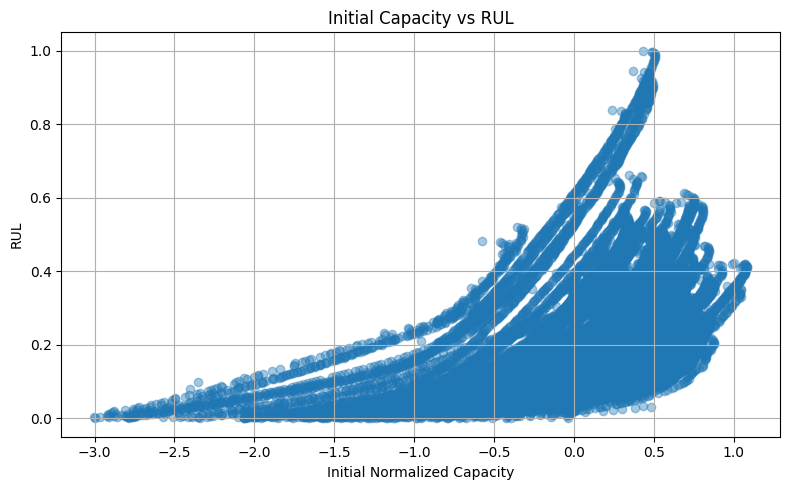

In [5]:
initial_caps = X_train[:, 0, 0]  # First timestep's value per sequence
plt.figure(figsize=(8, 5))
plt.scatter(initial_caps, y_train, alpha=0.4)
plt.title('Initial Capacity vs RUL')
plt.xlabel('Initial Normalized Capacity')
plt.ylabel('RUL')
plt.grid(True)
plt.tight_layout()
plt.show()
